# 03-1

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [16]:
print(diabetes.data[0:3])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]]


In [22]:
print(diabetes.data[0:3,1])
print(diabetes.data[2,0:2])
print(diabetes.data[0:3,0:2])

[ 0.05068012 -0.04464164  0.05068012]
[0.08529891 0.05068012]
[[ 0.03807591  0.05068012]
 [-0.00188202 -0.04464164]
 [ 0.08529891  0.05068012]]


In [9]:
diabetes.target[:3]

array([151.,  75., 141.])

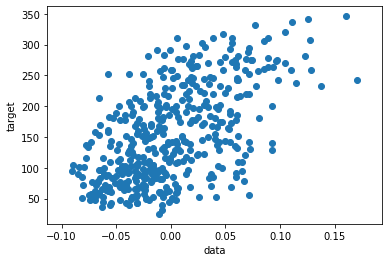

In [6]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('data')
plt.ylabel('target')
plt.show()

In [2]:
x = diabetes.data[:,2]
y = diabetes.target

# 03-2

In [5]:
w=1
b=1
y_hat = x[0]*w + b
print(y_hat)

1.0616962065186886


In [6]:
w_inc = w + 0.1
y_hat_inc = x[0]*w_inc + b
print(y_hat_inc)

1.0678658271705574


In [7]:
w_rate = (y_hat_inc - y_hat)/(w_inc - w)
print(w_rate)

0.061696206518688734


In [8]:
w_new = w_rate + w
print(w_new)

1.0616962065186888


In [9]:
b_inc = b+0.1
y_hat_inc = x[0]*w + b_inc
print(y_hat_inc)

1.1616962065186887


In [10]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [11]:
b_new = b+1
print(b_new)

2


# 오차 역전파

In [12]:
err = y[0] - y_hat
w_new = w + w_rate*err
b_new = b + 1*err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [13]:
y_hat = x[1]*w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate*err
b_new = b_new + 1*err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [15]:
for x_i, y_i in zip(x,y):
    y_hat = x_i*w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate*err
    b = b + 1*err
print(w,b)

587.8654539985689 99.40935564531424


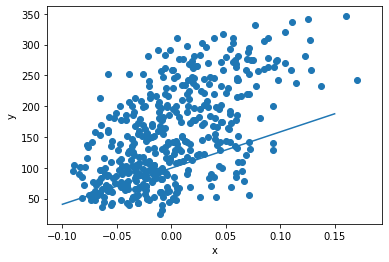

In [19]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1*w + b)
pt2 = (0.15, 0.15*w + b)
plt.plot([pt1[0],pt2[0]], [pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
for i in range(1,100):
    for x_i, y_i in zip(x,y):
        y_hat = x_i*w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate*err
        b = b + 1*err
print(w,b)

913.5973364345905 123.39414383177204


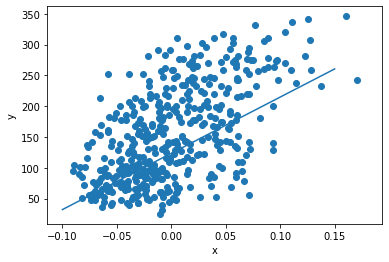

In [21]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1*w + b)
pt2 = (0.15, 0.15*w + b)
plt.plot([pt1[0],pt2[0]], [pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
x_new = 0.18
y_pred = x_new*w + b
print(y_pred)

287.8416643899983


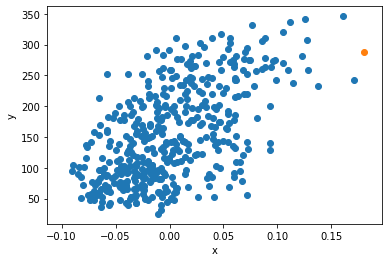

In [25]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 03-3 손실함수(loss function)

# 03-4 뉴런 클래스 만들기

In [3]:
class Neuron:
    
    def __init__(self):
        self.w = 1
        self.b = 1
        
    def forpass(self, x):
        y_hat = x*self.w + self.b
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1* err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        for i in range(epochs):
            for x_i, y_i in zip(x,y):
                y_hat = self.forpass(x_i)
                err = -(y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

In [4]:
neuron = Neuron()
neuron.fit(x,y)

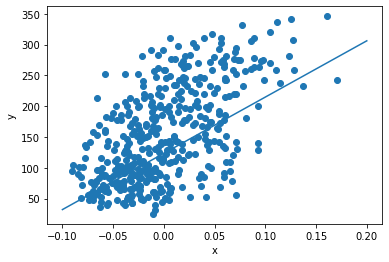

In [14]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1*neuron.w + neuron.b)
pt2 = (0.2, 0.2*neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()